In [1]:
import math
import numpy as np
import torch
from training import TrainerParameters, CreateTrainer, Plot2D
from factories.data import DataFactory
%matplotlib inline

torch.manual_seed(0)
np.random.seed(0)

# Settings

In [2]:
params = TrainerParameters()
params.folder = 'results/'
params.comment = 'BasicIllustration'
params.debug = False
params.Iterations = 15000
params.identifier = 'highres32'
params.trainer['lr_init'] = 1e-2
params.trainer['N_PE_updates'] = 3 
params.trainer['N_monte_carlo_analysis'] = 64  
params.trainer['N_monte_carlo_analysis_final'] = 1024 
params.trainer['N_monitor_interval'] = 1000
params.trainer['N_PE_updates_final'] = 250  
params.trainer['N_tensorboard_logging_interval'] = 1000

params.margs['dim_latent'] = 16
params.margs['ptype'] = 'NDP'
params.margs['device'] = 'best'

params.trainer['N_vo_update_interval'] = 250
params.trainer['N_vo_holdoff'] = 250  # 1000
params.trainer['N_monte_carlo_vo'] = 128

params.scheduler['milestones'] = [250, 1500]
params.scheduler['factor'] = math.sqrt(0.1)

########### DATA AND VO ##############
params.data['N_u'] = 1024
params.data['N_s'] = 128
params.data['N_u_max'] = 2048
params.data['N_s_max'] = 128
params.data['N_vo_max'] = 128
params.data['N_vo'] = 0
params.data['N_val'] = 128
params.data['armortized_bs'] = 64
params.data['vo_spec'] = dict()




# Create trainer

Load data, and create trainer (with the generative model being created in the background). Use stochastic variational inference for optimization of the ELBO. 

In [3]:
# get data for training and validation
df = DataFactory.FromIdentifier(params.identifier)
dl, dlu = df.setup()

# create trainer
trainer = CreateTrainer(params, dl, dlu)

>>> Setting GPU as device for computation <<<


In [4]:
# run trainer
trainer.run(params.Iterations, verbose=False)

100%|██████████| 15000/15000 [07:01<00:00, 35.57it/s]


### Training 


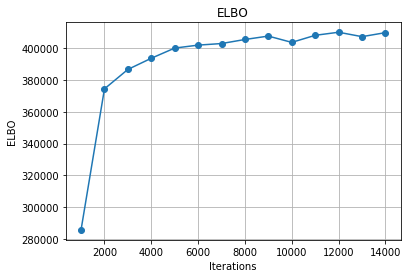

In [5]:
trainer.plot_elbo(figsize=(6,4))

In [6]:
print("Achieved relative error: {}".format(trainer.results()['r2_y']))
print("Achieved predictive logscore: {}".format(trainer.results()['logscore_y']))

Achieved relative error: 0.9799582958221436
Achieved predictive logscore: 2.329190492630005


### Examples: Mean prediction vs. reference (on validation dataset)

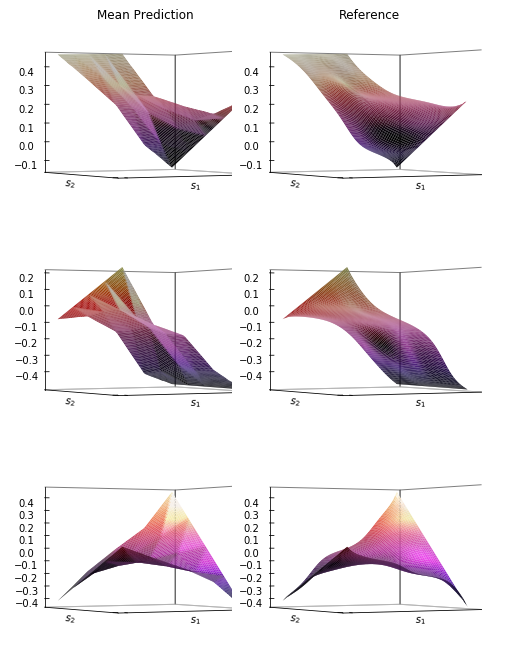

In [7]:
Plot2D(trainer, [0,7,8])